In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
import plotly.express as px

In [2]:
# Define a dictionary for unique color and marker combinations with all regions
region_styles = {
    'Alta Floresta': ('blue', 'o'),
    'Barra do Garças': ('green', 's'),
    'Confresa - Vila Rica': ('red', 'd'),
    'Cuiabá': ('purple', '*'),
    'Cáceres': ('orange', 'x'),
    'Diamantino': ('brown', '^'),  
    'Jaciara': ('pink', 'v'),       
    'Juara': ('gray', '<'),         
    'Juína': ('olive', '>'),        
    'Mirassol D\'oeste': ('cyan', 's'),  
    'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
    'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
    'Primavera do Leste': ('teal', '^'),  
    'Rondonópolis': ('lime', 'v'),      
    'Sinop': ('darkviolet', '<'),      
    'Sorriso': ('salmon', '>'),         
    'Tangará da Serra': ('gold', '*'),  
    'Água Boa': ('tan', 's')           
}

In [3]:
def create_plot(file_path, sheet_name, output_path, y_zero_line=False, show_plot=False):
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    }) 
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Get unique regions from the data
    regions = df['Region'].unique()
    
    # Store all lines to update later
    lines_to_update = []
    
    # Plot fitted lines for each region
    for region in regions:
        region_df = df[df['Region'] == region]
        if not region_df.empty:
            # Get the color and marker for the region from the dictionary
            if region in region_styles:
                color, marker = region_styles[region]
            else:
                # Default to a default color and marker if not specified
                print(f"KeyError: Region '{region}' not found in styles dictionary")
                continue  # Skip this region instead of returning
                
            # Plot regression line without scatter points
            ax_plot = sns.regplot(
                x='Year', 
                y='Percentage change', 
                data=region_df,
                scatter=False,  # Don't show scatter points
                ci=None, 
                ax=ax,
                line_kws={
                    'color': color,
                    'linestyle': '-',
                    'linewidth': 2.5,
                    'alpha': 0.9
                }
            )
            
            # Store information to update line styles
            for line in ax.get_lines():
                if line.get_color() == color and line not in lines_to_update:
                    lines_to_update.append((line, color, marker))
                    break
    
    # Update lines to add markers along the line
    for line, color, marker in lines_to_update:
        # Get line data
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Remove the original line
        line.remove()
        
        # Create a new line with markers
        ax.plot(
            xdata, ydata,
            color=color,
            linestyle='-',
            linewidth=2.5,
            alpha=0.9,
            marker=marker,
            markevery=0.1,  # Place markers periodically
            markersize=10,
            markerfacecolor=color,
            markeredgecolor='black',
            markeredgewidth=0.5
        )
    
    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if y_zero_line:
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    
    # Create custom legend
    legend_elements = []
    for region, (color, marker) in region_styles.items():
        # Clean up region name for display
        display_name = region.replace(" - ", " ").replace(" do ", " ").replace(" da ", " ")
        
        # Create a line with marker for the legend
        legend_elements.append(
            Line2D([0], [0], 
                   color=color, 
                   marker=marker,
                   linestyle='-',
                   lw=2.5,
                   markersize=10,
                   markerfacecolor=color,
                   markeredgecolor='black',
                   label=display_name)
        )
    
    # Add legend to the plot
    legend = ax.legend(
        handles=legend_elements,
        fontsize=16,
        ncol=6,
        bbox_to_anchor=(0.5, -0.2),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2,
        handlelength=2.5,
        handletextpad=0.8
    )
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    # Save plot - use different parameters based on file extension
    if output_path.lower().endswith('.jpg') or output_path.lower().endswith('.jpeg'):
        fig.savefig(output_path, dpi=1800, bbox_inches='tight', facecolor='white')
    else:
        fig.savefig(output_path, dpi=1800, bbox_inches='tight', facecolor='white')
    
    plt.close(fig)

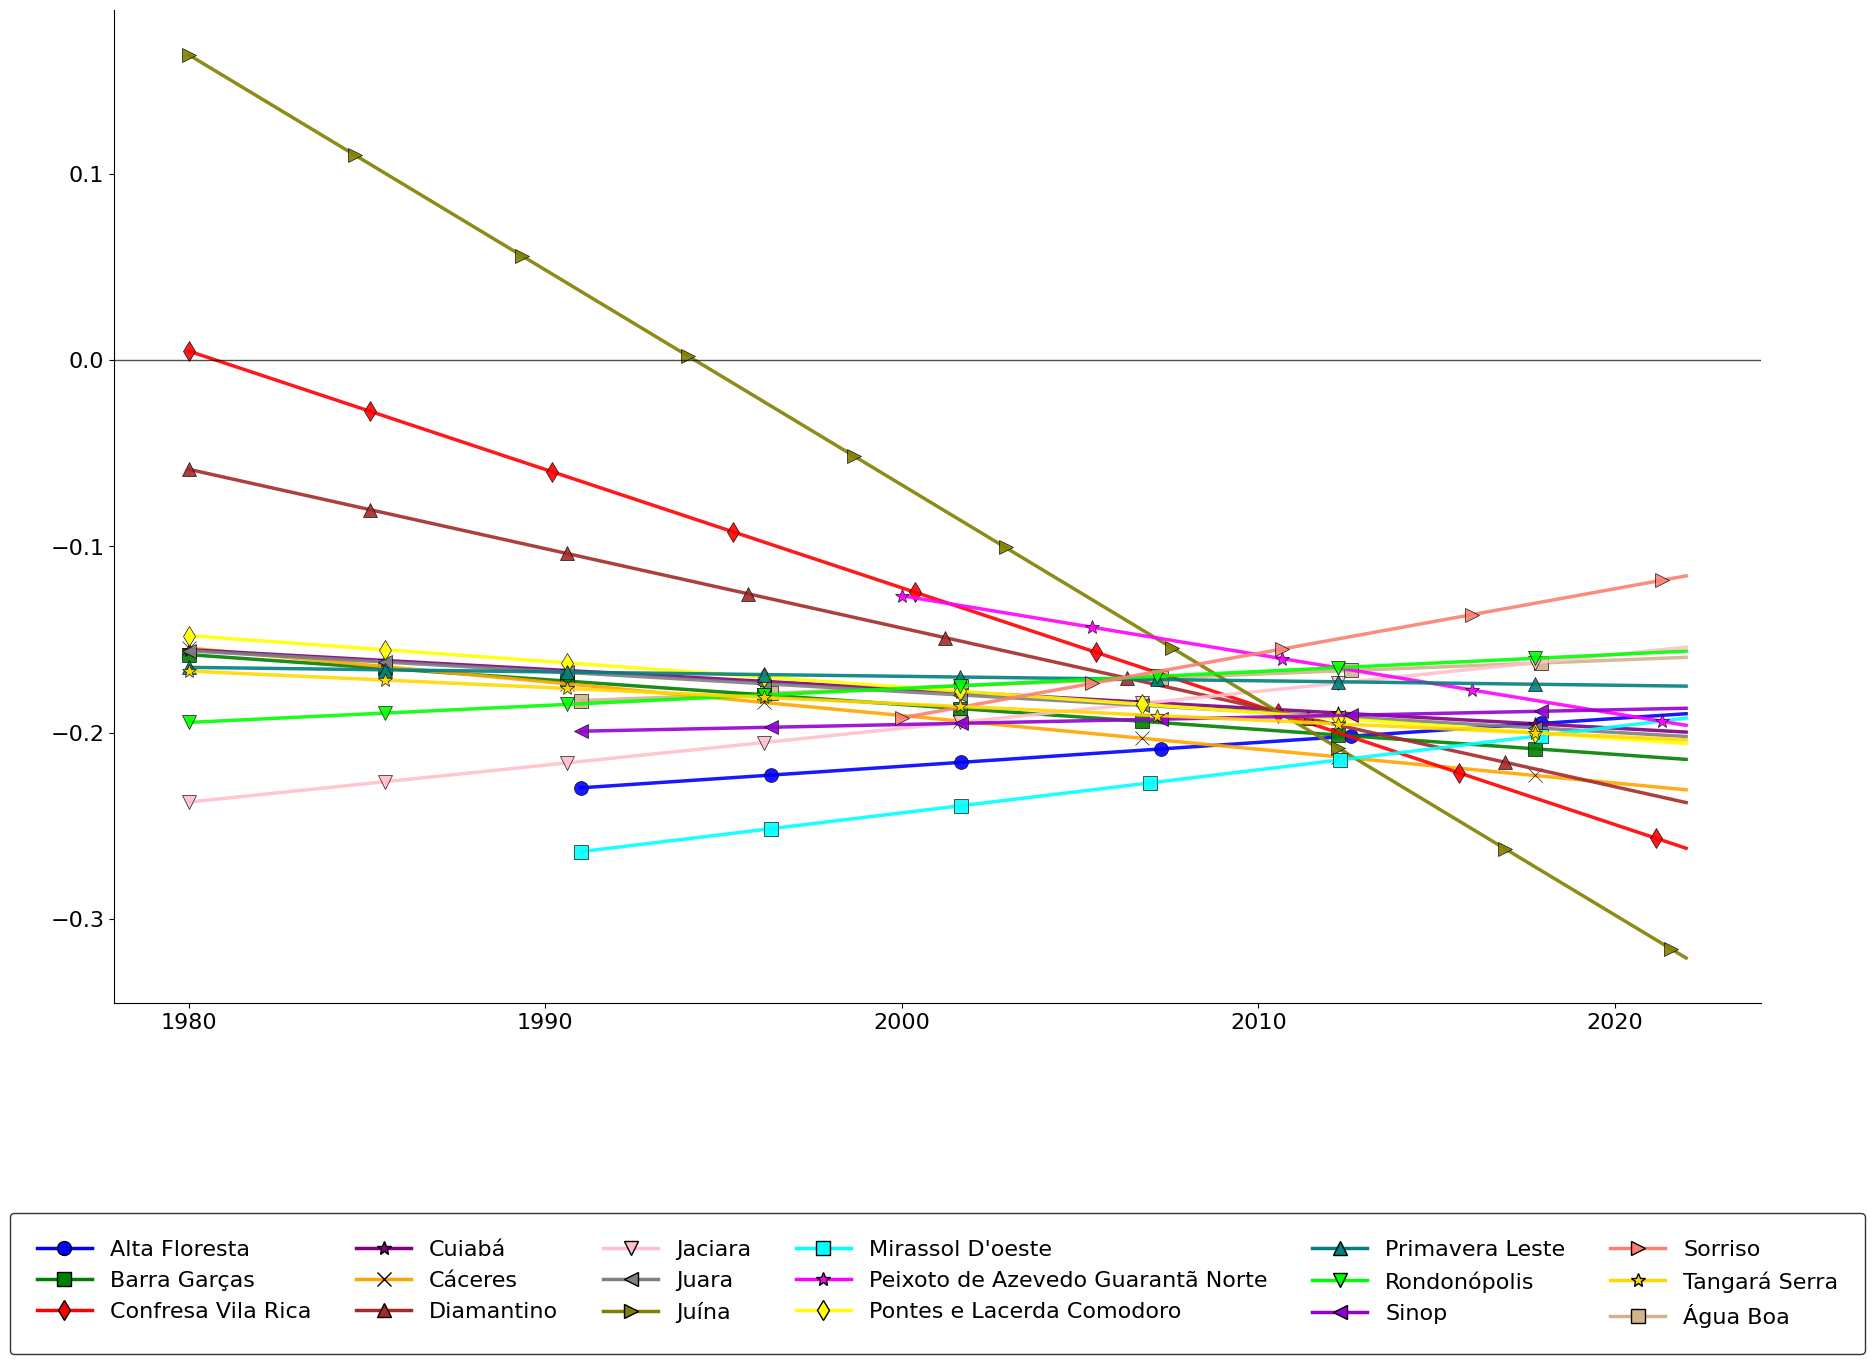

In [4]:
# Young dependency ratio plot
create_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 11.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph3.jpg",
    y_zero_line=True,
    show_plot=True
)

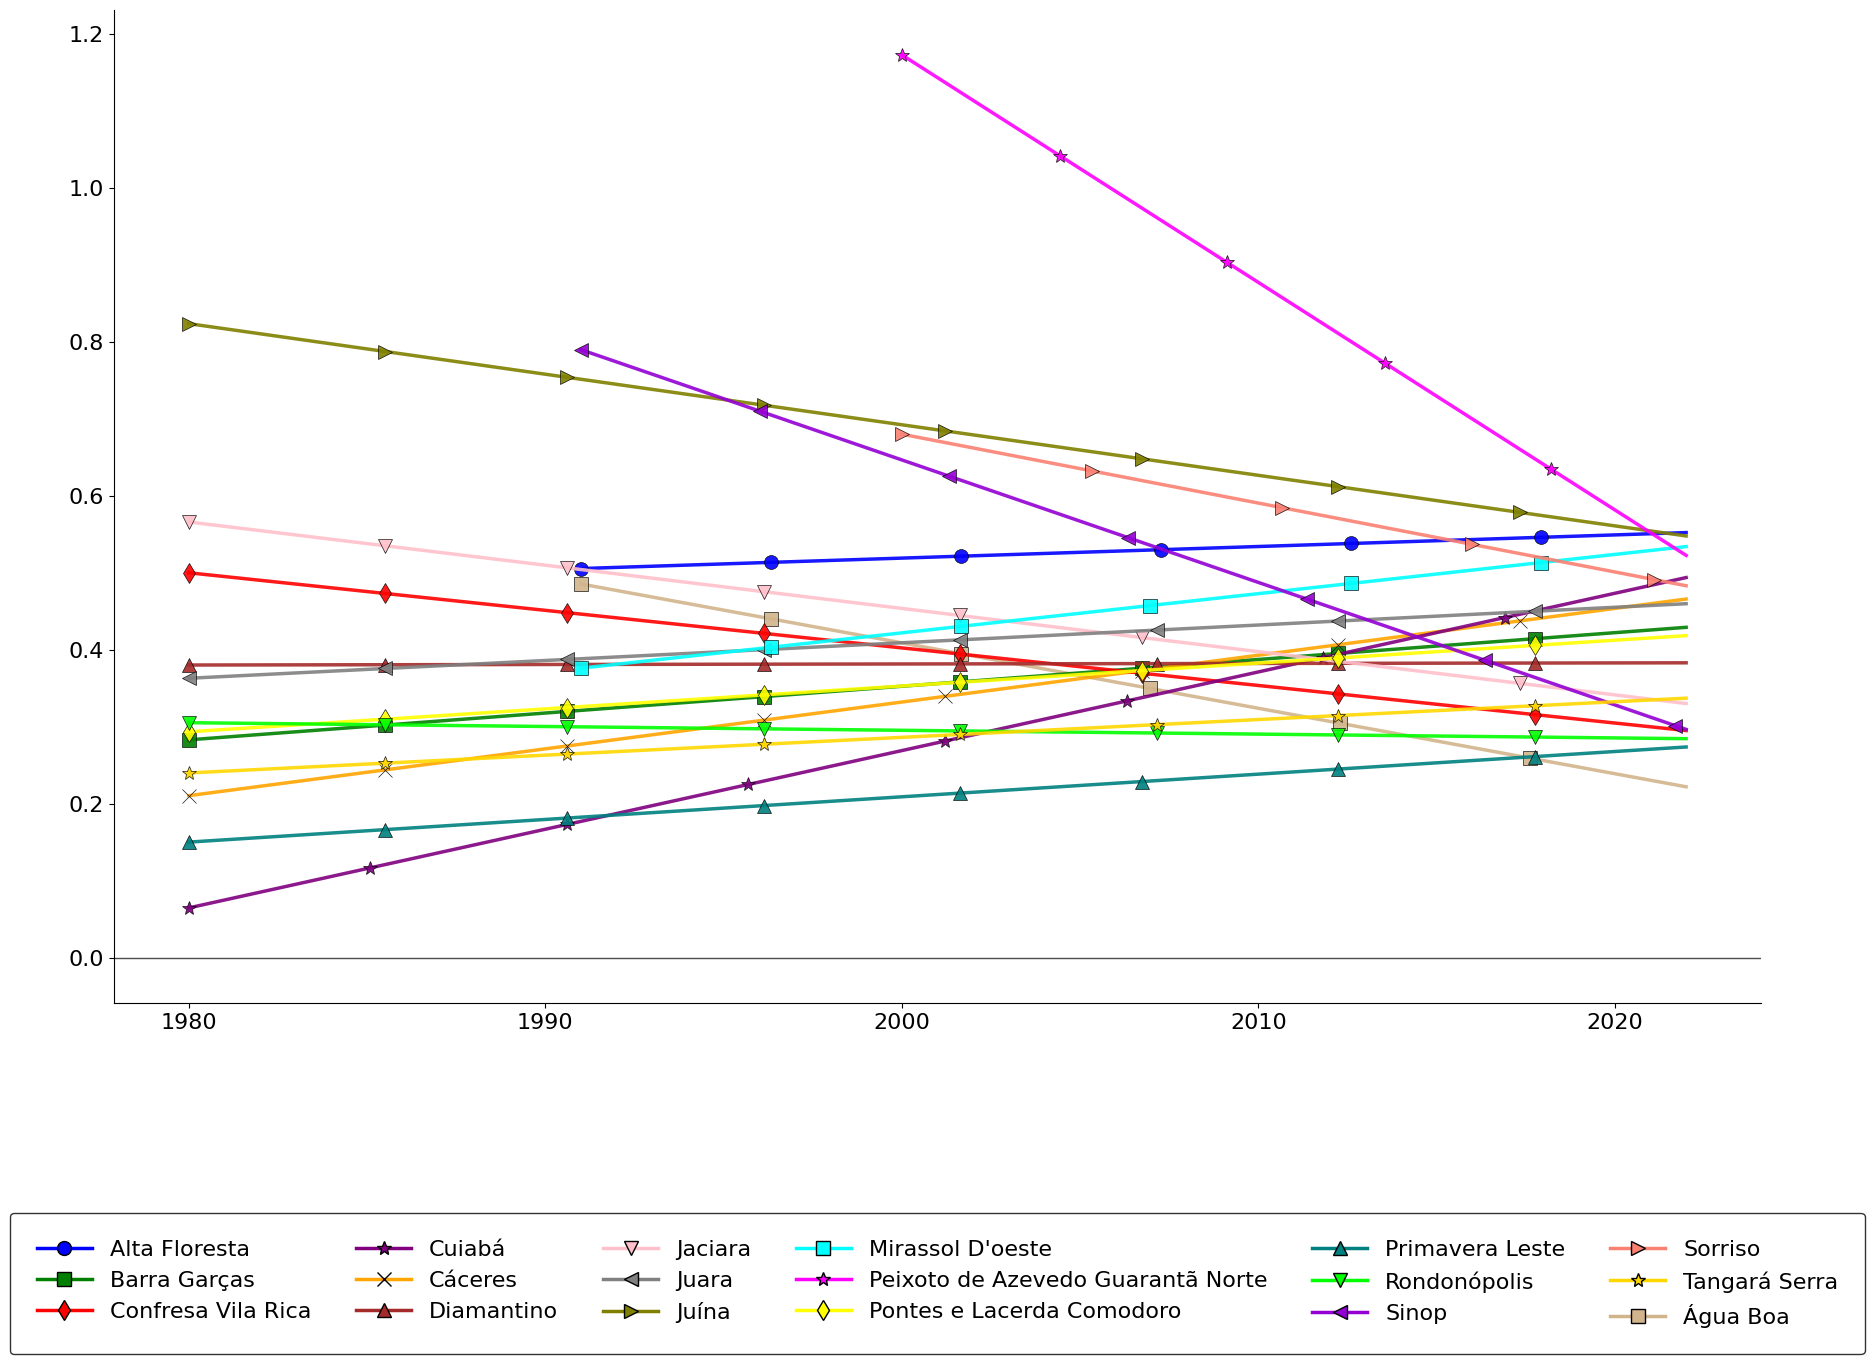

In [5]:
# Elderly dependency ratio plot
create_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 12.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph4.jpg",
    y_zero_line=True,
    show_plot=True
)

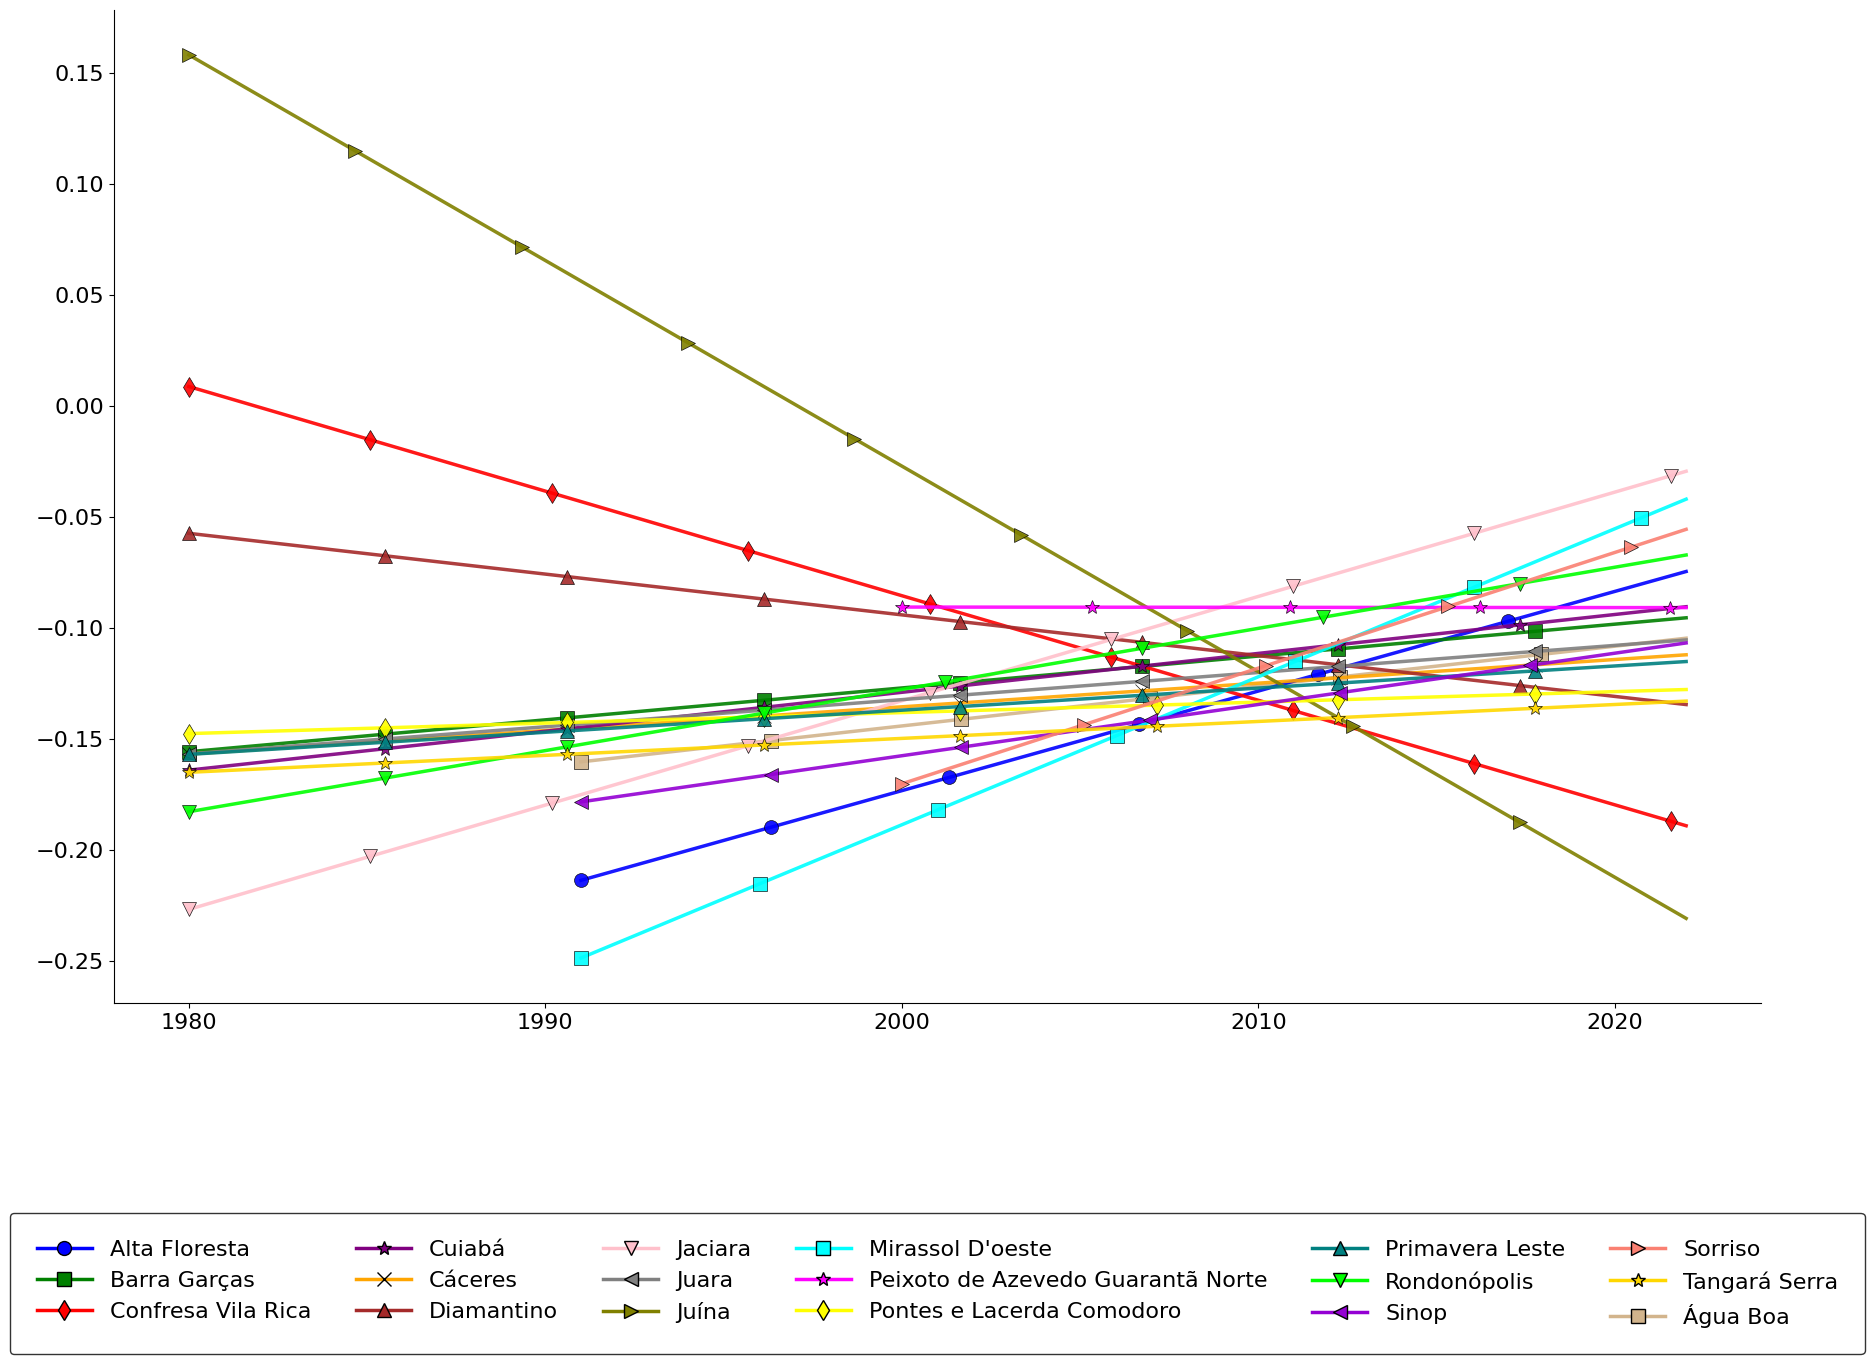

In [6]:
# Total dependency ratio
create_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 13.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph5.jpg",
   show_plot=True
)

In [7]:
def create_interactive_linear_plot(file_path, sheet_name, output_path, plot_title="", y_zero_line=False, show_plot=False):
    """
    Creates interactive linear plots with complete region validation.
    Returns: (figure_object, list_of_unplotted_regions)
    """
    import pandas as pd
    import numpy as np
    import plotly.graph_objects as go

    # ===== DATA VALIDATION =====
    try:
        # Read and validate data
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        required_columns = ['Percentage change', 'Year', 'Region']
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {', '.join(missing_cols)}")
            
        # Convert to percentage if needed
        if df['Percentage change'].max() <= 1:
            df['Percentage change'] = df['Percentage change'] * 100
            
    except Exception as e:
        print(f"Data validation error: {str(e)}")
        return None, []

    # ===== REGION CONFIGURATION =====
    region_styles = {
        'Alta Floresta': {'color': 'blue', 'line_style': '-'},
        'Barra do Garças': {'color': 'green', 'line_style': '--'},
        'Confresa - Vila Rica': {'color': 'red', 'line_style': '-'},
        'Cuiabá': {'color': 'purple', 'line_style': '--'},
        'Cáceres': {'color': 'orange', 'line_style': '-'},
        'Diamantino': {'color': 'brown', 'line_style': '--'},
        'Jaciara': {'color': 'pink', 'line_style': '-'},
        'Juara': {'color': 'gray', 'line_style': '--'},
        'Juína': {'color': 'olive', 'line_style': '-'},
        'Mirassol D\'oeste': {'color': 'cyan', 'line_style': '--'},
        'Peixoto de Azevedo - Guarantã do Norte': {'color': 'magenta', 'line_style': '-'},
        'Pontes e Lacerda - Comodoro': {'color': 'yellow', 'line_style': '--'},
        'Primavera do Leste': {'color': 'teal', 'line_style': '-'},
        'Rondonópolis': {'color': 'lime', 'line_style': '--'},
        'Sinop': {'color': 'darkviolet', 'line_style': '-'},
        'Sorriso': {'color': 'salmon', 'line_style': '--'},
        'Tangará da Serra': {'color': 'gold', 'line_style': '-'},
        'Água Boa': {'color': 'tan', 'line_style': '--'}
    }

    fig = go.Figure()
    unplotted_regions = []

    # ===== REGION PROCESSING =====
    for region, styles in region_styles.items():
        region_df = df[df['Region'] == region]
        
        # Validation checks
        if len(region_df) < 2:
            unplotted_regions.append(f"{region} (<2 data points)")
            continue
            
        years = region_df['Year'].values
        values = region_df['Percentage change'].values
        
        # Data quality check
        mask = np.isfinite(values) & np.isfinite(years)
        valid_points = sum(mask)
        
        if valid_points < 2:
            unplotted_regions.append(f"{region} (insufficient valid data)")
            continue
            
        try:
            # Force linear regression
            years = years[mask]
            values = values[mask]
            
            if len(np.unique(years)) < 2:
                unplotted_regions.append(f"{region} (no year variation)")
                continue
                
            m, b = np.polyfit(years, values, 1)
            fitted_y = m * years + b
            
            fig.add_trace(go.Scatter(
                x=years,
                y=fitted_y,
                mode='lines',
                name=region,
                line=dict(
                    color=styles['color'],
                    width=2.5,
                    dash='dash' if styles['line_style'] == '--' else 'solid'
                ),
                hovertemplate=f"<b>{region}</b><br>Year: %{{x}}<br>Change: %{{y:.2f}}%"
            ))
            
        except Exception as e:
            unplotted_regions.append(f"{region} (error: {str(e)})")

    # ===== PLOT FINALIZATION =====
    if not fig.data:  # No traces added
        print("No valid regions to plot")
        return None, unplotted_regions

    # Add zero line if requested
    if y_zero_line:
        fig.add_hline(y=0, line_dash="dash", line_color="black", opacity=0.5)

    # Create dropdown menu options
    dropdown_options = []
    for region in region_styles.keys():
        # Create visibility list - True only for this region
        visible_list = [trace.name == region for trace in fig.data]
        
        dropdown_options.append(
            dict(
                label=region,
                method="update",
                args=[{"visible": visible_list},
                      {"title": f"{plot_title} - {region}",
                       "showlegend": True}]
            )
        )

    # Add "Show All" option
    dropdown_options.insert(0, 
        dict(
            label="Show All",
            method="update",
            args=[{"visible": [True] * len(fig.data)},
                  {"title": plot_title,
                   "showlegend": True}]
        )
    )

    # Update layout with dropdown and grid configuration
    fig.update_layout(
        title=dict(
            text=plot_title,
            y=0.95,
            x=0.5,
            xanchor='center',
            yanchor='top',
            font=dict(size=18)
        ),
        xaxis_title='Year',
        yaxis_title='Percentage Change (%)',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5,
            font=dict(size=12)
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        height=800,
        margin=dict(t=100, b=150, l=50, r=50),
        
        # Grid configuration
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=False,
            showline=True,
            linewidth=2,
            linecolor='black'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=y_zero_line,
            zerolinecolor='black',
            zerolinewidth=1,
            showline=True,
            linewidth=2,
            linecolor='black'
        ),
        
        # Dropdown menu configuration
        updatemenus=[
            dict(
                buttons=dropdown_options,
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.15,
                yanchor="top",
                bgcolor="white",
                bordercolor="lightgray",
                borderwidth=1,
                font=dict(size=12)
            )
        ]
    )

    # ===== OUTPUT HANDLING =====
    if output_path:
        if not output_path.lower().endswith('.html'):
            output_path += '.html'
        fig.write_html(output_path, include_plotlyjs='cdn')
    
    if show_plot:
        fig.show()

    # Print unplotted regions if any
    if unplotted_regions:
        print("\nRegions not plotted:")
        for region in unplotted_regions:
            print(f"- {region}")

    return fig, unplotted_regions

In [8]:
# Young dependency ratio plot
create_interactive_linear_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 11.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Young_dependency_ratio.html",
    plot_title="Young dependency ratio plot",
    y_zero_line=True,
    show_plot=True
)

(Figure({
     'data': [{'hovertemplate': '<b>Alta Floresta</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'blue', 'dash': 'solid', 'width': 2.5},
               'mode': 'lines',
               'name': 'Alta Floresta',
               'type': 'scatter',
               'x': {'bdata': 'xwfQB9oH5gc=', 'dtype': 'i2'},
               'y': {'bdata': 'SDWn42bzNsDA/Sb84ss1wNAxQ1CJgzTAID2YG4T5MsA=', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Barra do Garças</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'green', 'dash': 'dash', 'width': 2.5},
               'mode': 'lines',
               'name': 'Barra do Garças',
               'type': 'scatter',
               'x': {'bdata': 'vAfHB9AH2gfmBw==', 'dtype': 'i2'},
               'y': {'bdata': 'gFbho9qcL8BA1J3WD0cxwLCYiLc3ezLAcI9U6pzRM8Cw6uLAfGw1wA==', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Confresa - Vila Rica</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'li

In [9]:
# Elderly dependency ratio plot
create_interactive_linear_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 12.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Elderly_dependency_ratio.html",
    plot_title="Elderly Dependency Ratio",
    y_zero_line=True,
    show_plot=True
)

(Figure({
     'data': [{'hovertemplate': '<b>Alta Floresta</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'blue', 'dash': 'solid', 'width': 2.5},
               'mode': 'lines',
               'name': 'Alta Floresta',
               'type': 'scatter',
               'x': {'bdata': 'xwfQB9oH5gc=', 'dtype': 'i2'},
               'y': {'bdata': 'ZDxz7a0t4D/YxHJcs5zgPzjOVbsOGOE/fNn/+RWs4T8=', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Barra do Garças</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'green', 'dash': 'dash', 'width': 2.5},
               'mode': 'lines',
               'name': 'Barra do Garças',
               'type': 'scatter',
               'x': {'bdata': 'vAfHB9AH2gfmBw==', 'dtype': 'i2'},
               'y': {'bdata': 'oPd00BMg0j/AJ39A45LUP/CU5IS7k9Y/kGMcX4/N2D8g9fhkWnnbPw==', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Confresa - Vila Rica</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'li

In [10]:
# Total dependency ratio plot
create_interactive_linear_plot(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Table 13.xlsx",
    "Planilha2",
    r"C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Total_dependency_ratio.html",
    plot_title="Total Dependency Ratio",
    show_plot=True
)

(Figure({
     'data': [{'hovertemplate': '<b>Alta Floresta</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'blue', 'dash': 'solid', 'width': 2.5},
               'mode': 'lines',
               'name': 'Alta Floresta',
               'type': 'scatter',
               'x': {'bdata': 'xwfQB9oH5gc=', 'dtype': 'i2'},
               'y': {'bdata': 'AK9i3/tiNcCAMrntvVgxwMDewBcrtynAAHukJmHiHcA=', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Barra do Garças</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'line': {'color': 'green', 'dash': 'dash', 'width': 2.5},
               'mode': 'lines',
               'name': 'Barra do Garças',
               'type': 'scatter',
               'x': {'bdata': 'vAfHB9AH2gfmBw==', 'dtype': 'i2'},
               'y': {'bdata': 'YFc0kD4vL8AgprTf8wUswAC4egnObynAYOgdxhWQJsCgVXuoOB0jwA==', 'dtype': 'f8'}},
              {'hovertemplate': '<b>Confresa - Vila Rica</b><br>Year: %{x}<br>Change: %{y:.2f}%',
               'li